# Playing with CSKG grounding

# Setup for grounding

```
conda create -n mowgli-env python=3.6 
conda activate mowgli-env

git clone https://github.com/ucinlp/mowgli-uci

mv mowgli-uci grounding

cd grounding

pip install -r requirements.txt
conda install --yes faiss-cpu -c pytorch -n mowgli-env
python -m spacy download en_core_web_lg

cd ..
```

In [1]:
# IMPORTS
import pygraphviz as pgv
from IPython.display import Image

## I. Parsing questions and answers

In [2]:
from groundcn.graphify import graphify

In [3]:
def draw(G):
    return Image(G.draw(format='png', prog='dot'))

In [4]:
sentences=[
    'Max looked for the onions so that he could make a stew.',
#    'To get the bathroom counters dry after washing your face, take a small hand lotion and wipe away the extra water around the sink.',
#    'To get the bathroom counters dry after washing your face, take a small hand towel and wipe away the extra water around the sink.'
]

In [5]:
parse_trees=graphify.graphify_dataset(sentences)

/Users/filipilievski/opt/anaconda3/envs/mowgli-env/lib/python3.6/site-packages/torch/nn/modules/rnn.py:51: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  "num_layers={}".format(dropout, num_layers))
/Users/filipilievski/opt/anaconda3/envs/mowgli-env/lib/python3.6/site-packages/allennlp/data/token_indexers/token_characters_indexer.py:56: UserWarning: You are using the default value (0) of `min_padding_length`, which can cause some subtle bugs (more info see https://github.com/allenai/allennlp/issues/1954). Strongly recommend to set a value, usually the maximum size of the convolutional layer size when using CnnEncoder.
  UserWarning)
100%|██████████| 1/1 [00:00<00:00,  6.50it/s]


In [6]:
parse_trees

[{'sentence': 'Max looked for the onions so that he could make a stew.',
  'tokenized_sentence': ['Max',
   'looked',
   'for',
   'the',
   'onions',
   'so',
   'that',
   'he',
   'could',
   'make',
   'a',
   'stew',
   '.'],
  'nodes': {'b8b44c42212269fa82b8a800e4d05b3b': {'phrase': ['looked'],
    'start_idx': 1,
    'end_idx': 1,
    'entity_type': [None]},
   'd7f12a857dcf22242159a4ac9c75e4a7': {'phrase': ['Max'],
    'start_idx': 0,
    'end_idx': 0,
    'entity_type': ['PERSON']},
   '9d49eb0165f37563ceec0f4aace44eeb': {'phrase': ['for', 'the', 'onions'],
    'start_idx': 2,
    'end_idx': 4,
    'entity_type': [None, None, None]},
   '38e60e63114e00d392d337e9a9c16898': {'phrase': ['so',
     'that',
     'he',
     'could',
     'make',
     'a',
     'stew'],
    'start_idx': 5,
    'end_idx': 11,
    'entity_type': [None, None, None, None, None, None, None]},
   '5ae027510ceb98789ca570c5ba998f3c': {'phrase': ['make'],
    'start_idx': 9,
    'end_idx': 9,
    'entity_type

### Nicer visualization

In [7]:
rels=[]
for sent_data in parse_trees:
    #print('Sentence:', sent_data['sentence'])
    #print('Tokenized sentence', sent_data['tokenized_sentence'])

    G=pgv.AGraph(strict=False, directed=True)
    
    nodes={}
    for n_id, n_data in sent_data['nodes'].items():
        nodes[n_id]=' '.join(n_data['phrase'])
    
    for e_id, e_data in sent_data['edges'].items():
        n1=nodes[e_data['head_node_id']]
        n2=nodes[e_data['tail_node_id']]
        rel=e_data['edge_name']
        edge=(e_data['head_node_id'], rel, e_data['tail_node_id'])
        rels.append(edge)
        
        G.add_edge(n1, n2, label=rel)
        

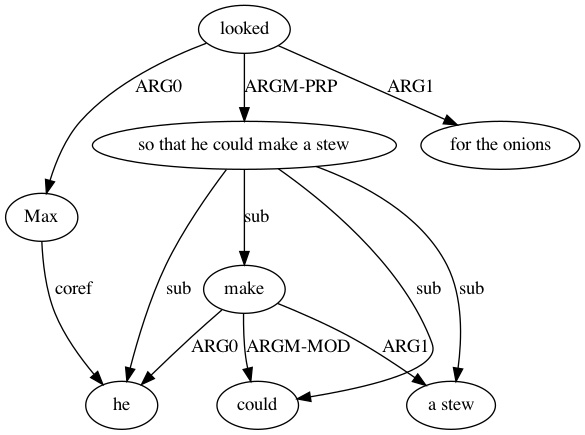

In [8]:
draw(G)

## II. Grounding questions and questions to ConceptNet

In [ ]:
from groundcn.graphify import link

In [ ]:
linked_data=link.link(parse_trees, embedding_file='grounding/numberbatch-en-19.08.txt')

In [ ]:
rels

In [ ]:
links={}
for sent_data in linked_data:
    print('Sentence:', sent_data['sentence'])
    linkedG=pgv.AGraph(strict=False, directed=True)
    for n_id, n_data in sent_data['nodes'].items():
        print('Node phrase:', n_data['phrase'])
        for c in reversed(n_data['candidates']):
            print(c)
        print()
        
        links[n_id]=list(reversed(n_data['candidates']))[0]['uri']

    for edge in rels:
        linkedG.add_edge(links[edge[0]], links[edge[2]], label=edge[1])
    print()

In [ ]:
draw(linkedG)

## III. Grounding to CSKG

In [23]:
from groundcskg.graphify import link

In [ ]:
ft_emb_file='groundcskg/ft_embeddings.txt'
graph_emb_file='output/embeddings/graph_embedding.tsv'

In [29]:
linked_data=link.link(parse_trees, embedding_file='')

100%|██████████| 2160968/2160968 [00:57<00:00, 37810.86it/s]


AssertionError: 

In [25]:
rels

[('f9c3f8fe5fe4a1007f2f4e78140612fd',
  'ARG0',
  'e00b44cf951977a092d3a7ca40c21729'),
 ('f9c3f8fe5fe4a1007f2f4e78140612fd',
  'ARG1',
  '6d5226d1acbe021309607b7170d33ae7'),
 ('f9c3f8fe5fe4a1007f2f4e78140612fd',
  'ARGM-PRP',
  '7d593b48ad0f35b6d82582604eff48c7'),
 ('6643a1dc99bd61d5b0e61488c164c8e3',
  'ARG0',
  'dbd661117a04069e622cf5fdc95a471f'),
 ('6643a1dc99bd61d5b0e61488c164c8e3',
  'ARGM-MOD',
  '045e3ad02b1f99eb28737b864547f99f'),
 ('6643a1dc99bd61d5b0e61488c164c8e3',
  'ARG1',
  '495b5459f5cef8ffbda49154135030bb'),
 ('7d593b48ad0f35b6d82582604eff48c7',
  'sub',
  '6643a1dc99bd61d5b0e61488c164c8e3'),
 ('7d593b48ad0f35b6d82582604eff48c7',
  'sub',
  'dbd661117a04069e622cf5fdc95a471f'),
 ('7d593b48ad0f35b6d82582604eff48c7',
  'sub',
  '045e3ad02b1f99eb28737b864547f99f'),
 ('7d593b48ad0f35b6d82582604eff48c7',
  'sub',
  '495b5459f5cef8ffbda49154135030bb'),
 ('e00b44cf951977a092d3a7ca40c21729',
  'coref',
  'dbd661117a04069e622cf5fdc95a471f')]

In [26]:
links={}
for sent_data in linked_data:
    print('Sentence:', sent_data['sentence'])
    linkedG=pgv.AGraph(strict=False, directed=True)
    for n_id, n_data in sent_data['nodes'].items():
        print('Node phrase:', n_data['phrase'])
        for c in reversed(n_data['candidates']):
            print(c)
        print()
        
        links[n_id]=list(reversed(n_data['candidates']))[0]['uri']

    for edge in rels:
        linkedG.add_edge(links[edge[0]], links[edge[2]], label=edge[1])
    print()

Sentence: Max looked for the onions so that he could make a stew.
Node phrase: ['looked']
{'uri': 'en_look_at_me', 'score': 0.4670907258987427}
{'uri': 'en_looked_up_at', 'score': 0.46502965688705444}
{'uri': 'en_dug_up', 'score': 0.45828020572662354}
{'uri': 'en_he_he_he', 'score': 0.4304070472717285}
{'uri': 'en_sat_up', 'score': 0.410319447517395}

Node phrase: ['Max']
{'uri': 'en_de', 'score': -0.9073745012283325}
{'uri': 'en_r4', 'score': -0.9378683567047119}
{'uri': 'en_la_de_da', 'score': -0.9501252174377441}
{'uri': 'en_de_la', 'score': -0.9953792095184326}
{'uri': 'en_né', 'score': -1.0035395622253418}

Node phrase: ['for', 'the', 'onions']
{'uri': 'en_up_up', 'score': -0.07956266403198242}
{'uri': 'en_an_a', 'score': -0.08561909198760986}
{'uri': 'en_a_an', 'score': -0.08561909198760986}
{'uri': 'en_on_in_in', 'score': -0.089874267578125}
{'uri': 'en_up_of', 'score': -0.0945199728012085}

Node phrase: ['so', 'that', 'he', 'could', 'make', 'a', 'stew']
{'uri': 'en_eb', 'score'

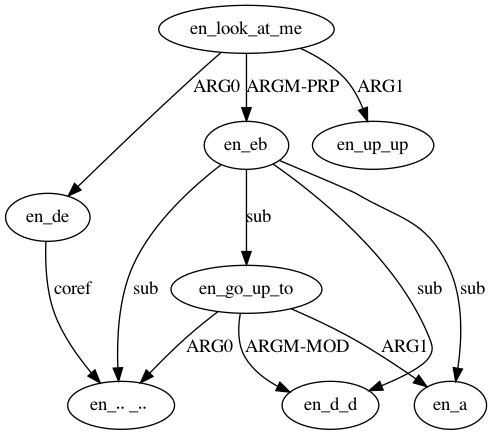

In [27]:
draw(linkedG)